# Data Science for Beginners - Part 2
Now that you have your environment running, we can do some stuff. We'll use this dataset:

[*2015 Flight Delays and Cancellations* provided by the U.S. Department of Transportation](https://www.kaggle.com/usdot/flight-delays). 

It is best to follow along with a running Jupyter environment - this can be local or on Azure Notebooks. It is also best to be running this on a cloned repo or library so that you'll also have the data accessible. 

# 1. Import Modules and Data

In [1]:
%matplotlib inline

import pandas as pd # Panel data processing
import numpy as np # Library for numerical data
import matplotlib.pyplot as plt # Plots
import matplotlib

# 2. Read Data from File

In [2]:
flights = pd.read_csv('./flights.csv', dtype={'AIRLINE': str, 'TAIL_NUMBER': str, 'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str, 'CANCELLATION_REASON': str})
display(flights)

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Dimensions: 5819079 rows, 31 cols


# 3. Remove Columns with Empty Values

In [3]:
flights = flights.dropna(axis=1, thresh=0.8*flights.shape[0])
flights.replace(r'\s+', np.nan, regex=True)
display(flights)

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0


Dimensions: 5819079 rows, 25 cols


# 4. Add 'DATE' and 'TOTAL_DELAY' Columns

In [4]:
flights['DATE'] = flights['MONTH'].astype(str) + '/' + flights['DAY'].astype(str) + '/' + flights['YEAR'].astype(str)
flights['TOTAL_DELAY'] = flights['DEPARTURE_DELAY'].astype(float) + flights['ARRIVAL_DELAY'].astype(float)
avg_delay_date = pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per day
display(avg_delay_date.sort_values(by='TOTAL_DELAY'))

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
DATE,,,
9/6/2015,0.650202,-7.740014,-7.105694
1/27/2015,-0.158885,-6.712094,-6.948588
12/8/2015,0.358515,-7.040739,-6.704500
9/1/2015,0.586392,-6.067026,-5.495606
11/14/2015,1.485864,-6.856257,-5.404459
11/26/2015,1.097445,-6.448770,-5.368416
10/13/2015,1.296322,-6.580374,-5.307817
11/25/2015,0.865064,-6.144799,-5.305108
9/23/2015,0.924410,-5.957098,-5.033794


In [5]:
airlines = pd.read_csv('./airlines.csv')
avg_delay_airline = pd.DataFrame(flights.groupby('AIRLINE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per airline

display(avg_delay_airline.sort_values(by=['TOTAL_DELAY']))

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
AIRLINE,,,
AS,1.785801,-0.976563,0.742363
HA,0.485713,2.023093,2.493010
DL,7.369254,0.186754,7.500053
US,6.141137,3.706209,9.787209
AA,8.900856,3.451372,12.277478
OO,7.801104,5.845652,13.581735
VX,9.022595,4.737706,13.731191
WN,10.581986,4.374964,14.892147
EV,8.715934,6.585379,15.200976


# 5. Add Graphs

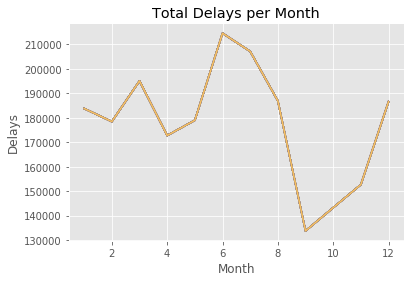

In [6]:
flights_delayed = flights[flights['TOTAL_DELAY'] > 0]

matplotlib.style.use('ggplot')
plt.plot(flights_delayed.groupby('MONTH').count())
plt.xlabel('Month', size = 12)
plt.ylabel('Delays', size = 12)
plt.title('Total Delays per Month')
plt.show()

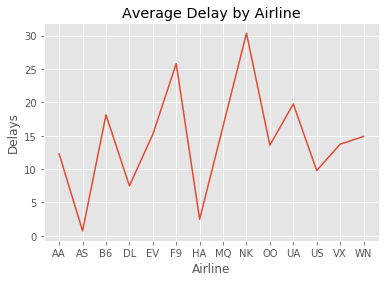

In [8]:
plt.plot(flights.groupby('AIRLINE')['TOTAL_DELAY'].mean())
plt.xlabel('Airline')
plt.ylabel('Delays')
plt.title('Average Delay by Airline')
plt.show()